In [1]:
import sys
import numpy as np
import pandas as pd
# import pyqtgraph as pg
import cnmodel as cnm
from cnmodel import populations
from cnmodel.util import sound
from neuron import h
import matplotlib.pyplot as plt

--No graphics will be displayed.


In [2]:
colors = {'stim': 'tab:blue',
          'sgc': 'tab:pink',
          'fusi': 'tab:purple',
          'int': 'tab:green',
          'ic': 'tab:orange'}

In [3]:
sgc_pop = populations.SGC()
fusi_pop = populations.Pyramidal()

In [4]:
sgc_pop.connect(fusi_pop)

In [5]:
num_total_sgc = len(sgc_pop.cells)
mid_sgc = num_total_sgc // 2

num_cells = 20
fusi_cfs = sgc_pop._get_cf_array(species='mouse')[mid_sgc - num_cells//2 : mid_sgc + num_cells//2]
fusi_cfs

array([4451.21750934, 4453.37777759, 4455.53909426, 4457.70145987,
       4459.86487491, 4462.02933991, 4464.19485536, 4466.36142178,
       4468.52903969, 4470.69770958, 4472.86743198, 4475.03820738,
       4477.21003631, 4479.38291927, 4481.55685678, 4483.73184934,
       4485.90789747, 4488.08500169, 4490.2631625 , 4492.44238041])

In [6]:
fusi_cell_ids = []
fusi_cells = []

for fusi_cf in fusi_cfs:

    fusi_cell_id = fusi_pop.select(1, cf=fusi_cf, create=True)[0]
    fusi_cell = fusi_pop.get_cell(fusi_cell_id)
    
    fusi_cell_ids.append(fusi_cell_id)
    fusi_cells.append(fusi_cell)

fusi_pop.resolve_inputs(depth=1)

In [7]:
sgc_cells_ids = []
sgc_cells = []

for fusi_cell_id in fusi_cell_ids:

    sgc_cell_ids = fusi_pop.cell_connections(fusi_cell_id)[sgc_pop]
    sgc_cells.extend([sgc_pop.get_cell(i) for i in sgc_cell_ids])
    sgc_cells_ids.extend(sgc_cell_ids)

sgc_cells = list(dict.fromkeys(sgc_cells))
sgc_cells_ids = list(dict.fromkeys(sgc_cells_ids))

In [8]:
len(sgc_cells)

232

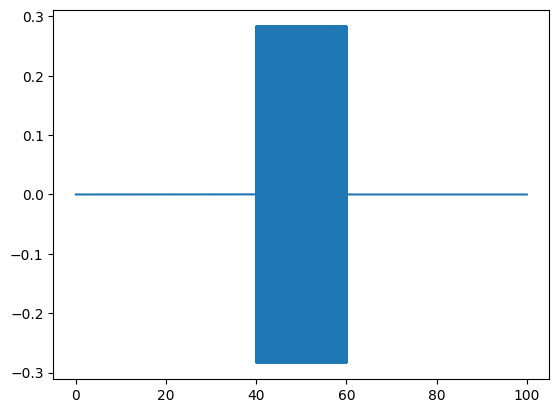

In [35]:
stim_freq = 4470
stim = sound.TonePip(rate=100e3, duration=100, f0=stim_freq, dbspl=80,
                              ramp_duration=2.5e-3, pip_duration=20, pip_start=[40])

plt.plot(stim.time, stim.sound, color=colors['stim'])

In [37]:
for sgc_cell in sgc_cells:
    sgc_cell.set_sound_stim(stim, seed=74, simulator='cochlea')

KeyboardInterrupt: 

In [ ]:
v_fusis = []
for fusi_cell in fusi_cells:
     
    v_fusi = h.Vector().record(fusi_cell.soma(0.5)._ref_v)
    v_fusis.append(v_fusi)

t = h.Vector().record(h._ref_t)

In [ ]:
h.tstop = 100
h.celsius = 34
h.dt = 0.025

cnm.util.custom_init()
h.run()